In [2]:
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.backend import clear_session
import tensorflow as tf
from keras import regularizers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

**Testing for model with or without validation**

In [3]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [4]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))# choose out_put dim 
model.add(Flatten())
model.add(Dense(250, activation='relu'))
# model.add(Dropout(0.6))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.6))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           256000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,256,501
Trainable params: 4,256,501
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
import matplotlib.pyplot as plt

In [6]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
196/196 - 36s - loss: 0.5220 - accuracy: 0.7054 - val_loss: 0.3066 - val_accuracy: 0.8709
Epoch 2/5
196/196 - 22s - loss: 0.1997 - accuracy: 0.9231 - val_loss: 0.3066 - val_accuracy: 0.8693
Epoch 3/5
196/196 - 21s - loss: 0.0840 - accuracy: 0.9756 - val_loss: 0.3365 - val_accuracy: 0.8727
Epoch 4/5
196/196 - 22s - loss: 0.0262 - accuracy: 0.9953 - val_loss: 0.3911 - val_accuracy: 0.8708
Epoch 5/5
196/196 - 21s - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.4451 - val_accuracy: 0.8696
Accuracy: 86.96%


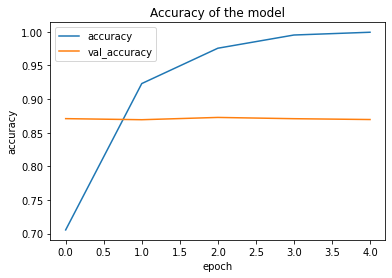

In [7]:
legend = ['accuracy', 'val_accuracy']
plt.title('Accuracy of the model')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(legend)

In [18]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [19]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [20]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))# choose out_put dim 
model.add(Flatten())
model.add(Dense(250, activation='relu'))
# model.add(Dropout(0.6))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.6))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# Fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
196/196 - 17s - loss: 0.5308 - accuracy: 0.7082
Epoch 2/5
196/196 - 16s - loss: 0.2136 - accuracy: 0.9169
Epoch 3/5
196/196 - 16s - loss: 0.1010 - accuracy: 0.9695
Epoch 4/5
196/196 - 16s - loss: 0.0385 - accuracy: 0.9926
Epoch 5/5
196/196 - 16s - loss: 0.0121 - accuracy: 0.9988
Accuracy: 86.57%


**Testing for learning rate**

In [28]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [29]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/11
196/196 - 19s - loss: 0.4095 - accuracy: 0.8049 - val_loss: 0.3110 - val_accuracy: 0.8652
Epoch 2/11
196/196 - 19s - loss: 0.1162 - accuracy: 0.9584 - val_loss: 0.4356 - val_accuracy: 0.8500
Epoch 3/11
196/196 - 18s - loss: 0.03

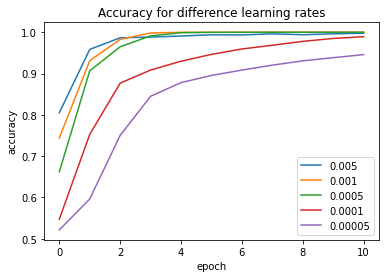

In [30]:
for learning_rate in [0.005, 0.001, 0.0005, 0.0001, 0.00005]:
  clear_session()
  model = Sequential()
  model.add(Embedding(top_words, 32, input_length=max_words))# choose out_put dim 
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
# model.add(Dropout(0.6))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.6))
# model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  print(model.summary())
  # Fit the model
  history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=11, batch_size=128, verbose=2)
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))   
  legend = ['0.005', '0.001', '0.0005', '0.0001', '0.00005']
  plt.title('Accuracy for difference learning rates')
  plt.plot(history.history['accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(legend)

In [21]:
print(history.history['accuracy'])

[0.5268399715423584, 0.7119200229644775, 0.8680800199508667, 0.9075599908828735, 0.9294000267982483]


**Test for depth and number of neuron in each layer of model**

In [44]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [45]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2510      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 4,162,773
Trainable params: 4,162,773
Non-trainable params: 0
______________________________________________

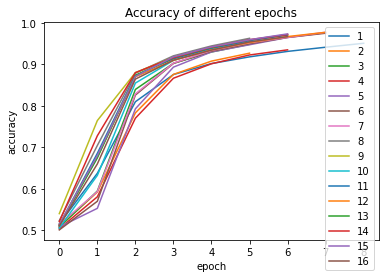

In [46]:
for neuron in range(1,17):
  clear_session()
  model = Sequential()
  model.add(Embedding(top_words, 32, input_length=max_words))# choose out_put dim 
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  # model.add(Dropout(dropout))
  model.add(Dense(10, activation='relu'))
  # model.add(Dropout(dropout))
  model.add(Dense(12, activation='relu'))
  # model.add(Dropout(dropout))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  print(model.summary())
  # Fit the model
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, mode='max')
  history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=128, verbose=2, callbacks=[callback])
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  legend = [str(i) for i in range(1,17)]
  plt.title('Accuracy of different epochs')
  plt.plot(history.history['accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(legend)

Test for dropout rate

In [6]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [7]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2510      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1

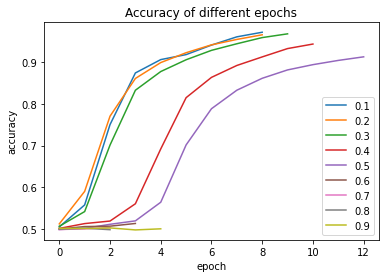

In [8]:
for dropout in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  clear_session()
  model = Sequential()
  model.add(Embedding(top_words, 32, input_length=max_words))# choose out_put dim 
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(10, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(12, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  print(model.summary())
  # Fit the model
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, mode='max')
  history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=128, verbose=2, callbacks=[callback])
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Accuracy: %.2f%%" % (scores[1]*100))
  legend = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8','0.9']
  plt.title('Accuracy of different epochs')
  plt.plot(history.history['accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(legend)